# Synthetic Geometric

In [58]:
from src.Utils import save_results, get_means
from src.ExistingAlgorithms import max_value, area, sklearn_available
from src.Parametric_UMAP import load_pumap
from src.GaussianMixture import gaussian_mixture
from src.Parametric_TSNE.train import load_model
from src.Parametric_TSNE.model import Network
from src.Dataset import dataset_dat

from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import Isomap, TSNE

import umap
import torch

# Import Data

In [59]:
# !cd 'src/Dataset/Data_Boulder' && zenodo_get 'https://doi.org/10.5281/zenodo.14101974'

# Compute

The entire file is precomputed and the results are saved in `src/Results_Geometric`.
The file is programmed to load the results if they are available in `PATH_RESULTS`.

## Data

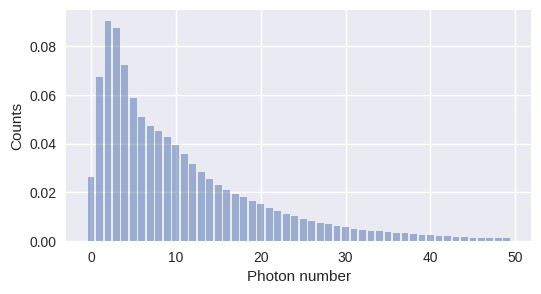

(57020, 350)

In [60]:
PATH_SAVE_LD = 'src/Results_Geometric/Low Dimension'
PATH_SAVE_D = 'src/Results_Geometric/Density'
PATH_RESULTS = 'src/Results_Geometric'
PATH_DATA = 'src/Dataset/Data_Boulder/data.zip'
PATH_R = 'src/Results_Geometric/randomIndexGeometric.npy'

weights = [0.07051088775512344, 0.21031270568057314, 0.38445365365055423, 0.6780434874139336, 
           0.6001082447024342, 0.9999999999999999, 0.629191619746778, 1.1954682934335052e-17, 0.9999999799606453, 0.9999999999649708]

data_train, data_test, expected_prob, db_train, db_test = dataset_dat(
   weights = weights,
   path_data = PATH_DATA,
   path_random_index = PATH_R,
   signal_size = 8192,
   interval = [0,350],
   standardize = True,
   plot_expected = True,
   plot_traces = False,
   n_photon_number = 50
)

data_train.shape

## Methods

### Max Value

In [61]:
X_l_MAX = max_value(
   X_high = data_test, 
   filtering = True
)

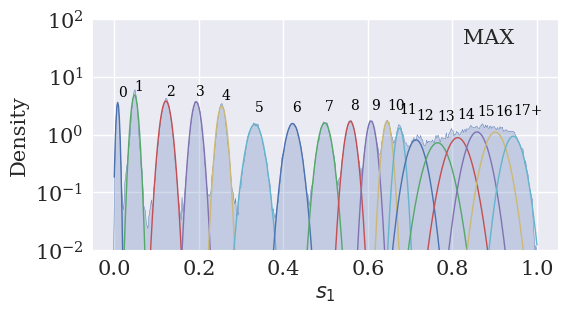

In [62]:
name_method = 'MAX'
gm = gaussian_mixture(
   X_low = X_l_MAX,
   X_high = data_test,
   means_init = get_means(name_method),
   number_cluster = 18,
   tol = 1e-6,
   cluster_iter = 10,
   width_plot=6,
   height_plot=3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)

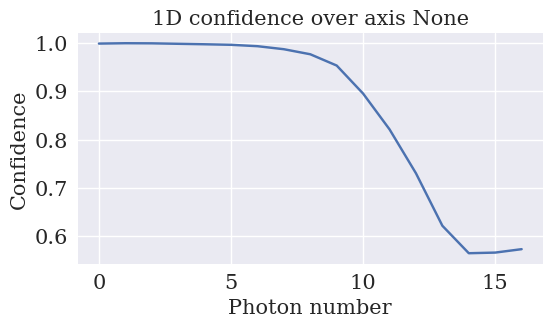

In [63]:
gm.plot_confidence_1d(expected_prob=expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Area

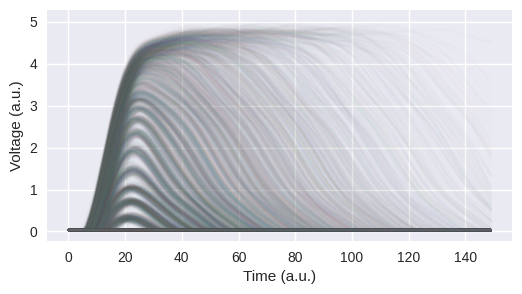

In [64]:
X_l_AREA  = area(
   X_high = data_test[:,:150], 
   filtering = True, 
   plot_filter = True, 
   threshold = 0.03, 
   critical_frequency = 0.1
)

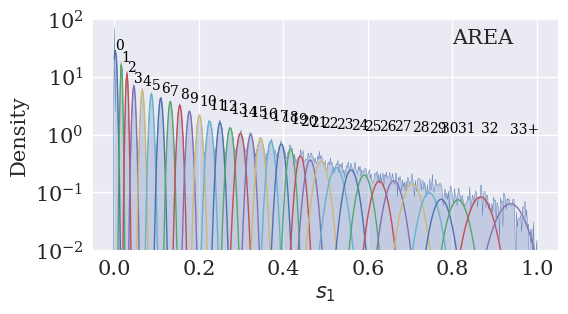

In [65]:
name_method = 'AREA'
gm = gaussian_mixture(
   X_low = X_l_AREA,
   X_high = data_test,
   number_cluster = 34,
   cluster_iter = 3,
   means_init = get_means(name_method, PATH_RESULTS),
   tol = 1e-6,
   width_plot=6,
   height_plot=3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

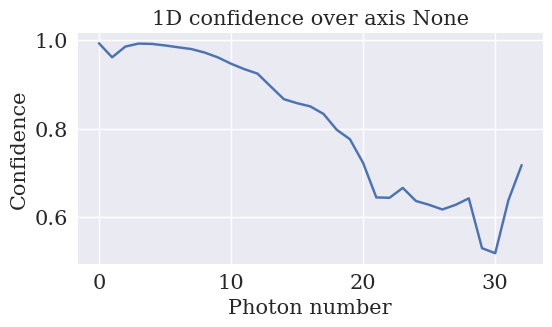

In [66]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Principal Component Analysis (PCA)

In [67]:
X_l_PCA = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = PCA, 
   n_components = 1, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


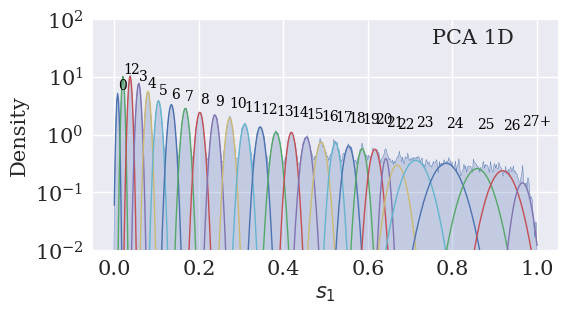

In [68]:
name_method = 'PCA 1D'
gm = gaussian_mixture(
   X_low = X_l_PCA,
   X_high = data_test,
   number_cluster = 28,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_RESULTS),
   tol = 1e-8,
   info_sweep = 0,
   plot_sweep = False,
   latex = False
)

gm.plot_density(
   bw_adjust = 0.03,
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

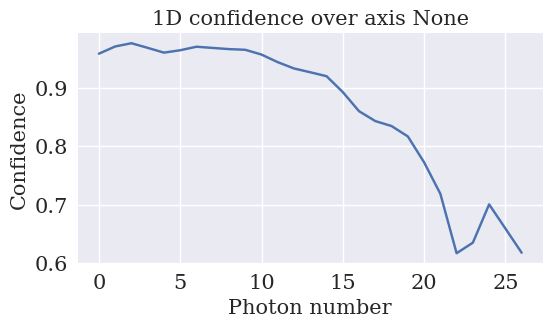

In [69]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

In [70]:
X_l_PCA = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = PCA, 
   n_components = 2, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


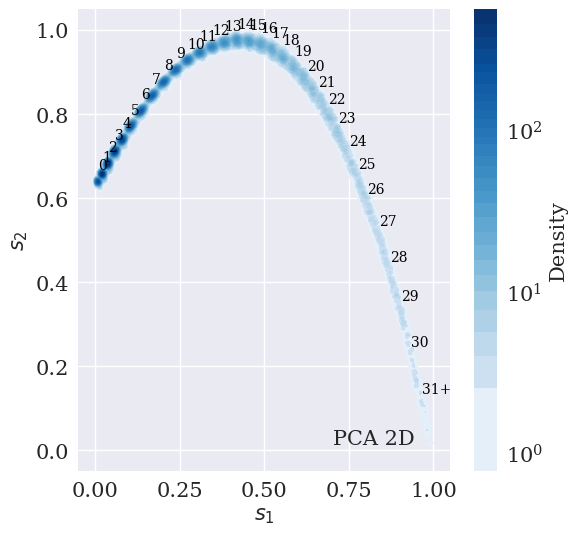

In [71]:
name_method = 'PCA 2D'
gm = gaussian_mixture(
   X_low = X_l_PCA,
   X_high = data_test,
   number_cluster = 32,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_RESULTS),
   tol = 1e-4,
   width_plot=6,
   height_plot=6
)

gm.plot_density(
   bw_adjust = 0.1,
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)

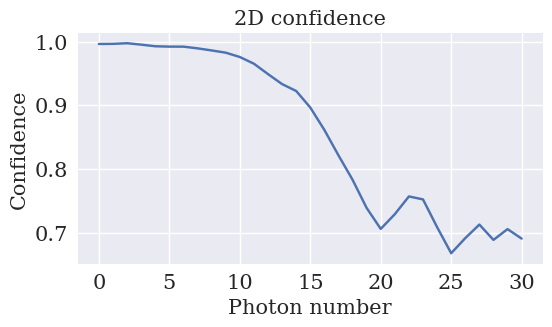

In [72]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Kernel PCA (Radial basis function)

In [73]:
X_l_KPCA_RBF = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = KernelPCA, 
   n_components = 2, 
   kernel="rbf", 
   gamma = 0.02, 
   random_state = 42
) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


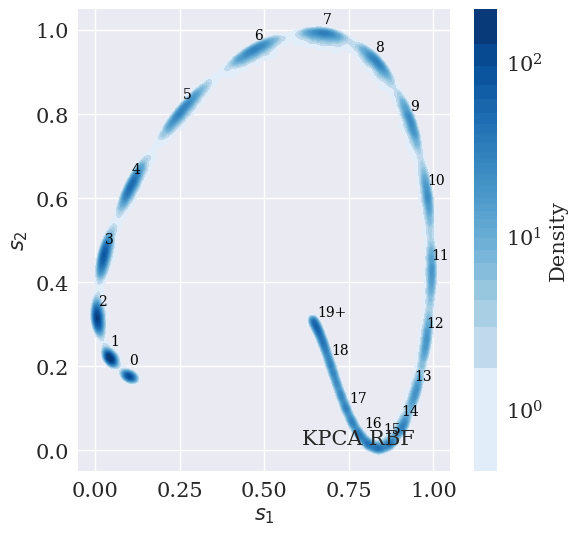

In [74]:
name_method = 'KPCA RBF'
gm = gaussian_mixture(
   X_low = X_l_KPCA_RBF,
   X_high = data_test,
   number_cluster = 20,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

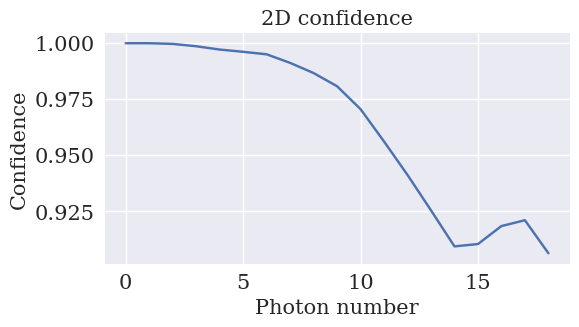

In [75]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Kernel PCA (Sigmoid)

In [76]:
X_l_KPCA_S = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = KernelPCA,
   n_components = 1,
   kernel = "sigmoid",
   gamma = 0.002, 
   random_state = 42
) 

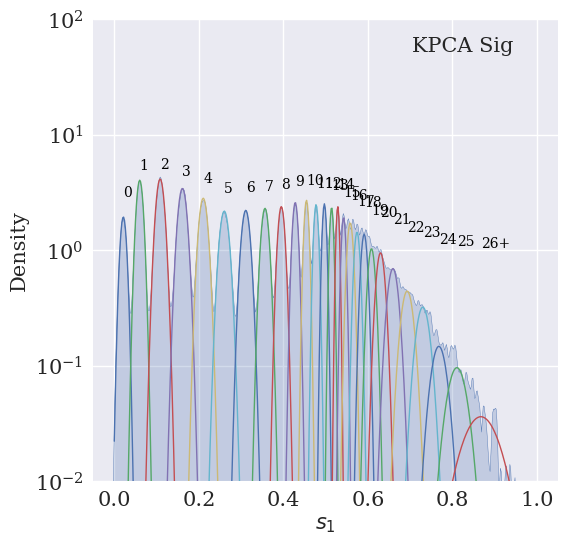

In [77]:
name_method = 'KPCA Sig'
gm = gaussian_mixture(
   X_low = X_l_KPCA_S,
   X_high = data_test,
   number_cluster = 27,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

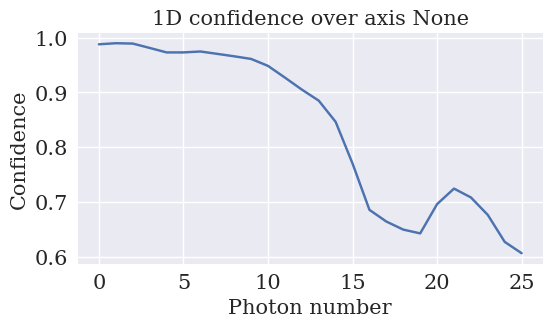

In [78]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Kernel PCA (Cosine)

In [79]:
X_l_KPCA_C = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = KernelPCA,
   n_components = 2,
   kernel = "cosine",
   gamma = 0.01, 
   random_state = 42
) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


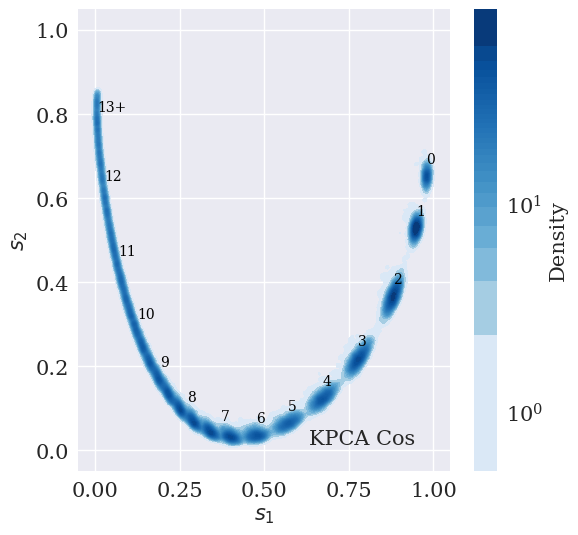

In [80]:
name_method = 'KPCA Cos'
gm = gaussian_mixture(
   X_low = X_l_KPCA_C,
   X_high = data_test,
   number_cluster = 14,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

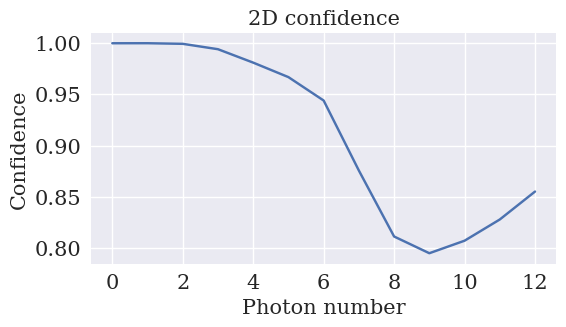

In [81]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [82]:
X_l_tSNE = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = TSNE,
   n_components = 2, 
   perplexity = 450, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


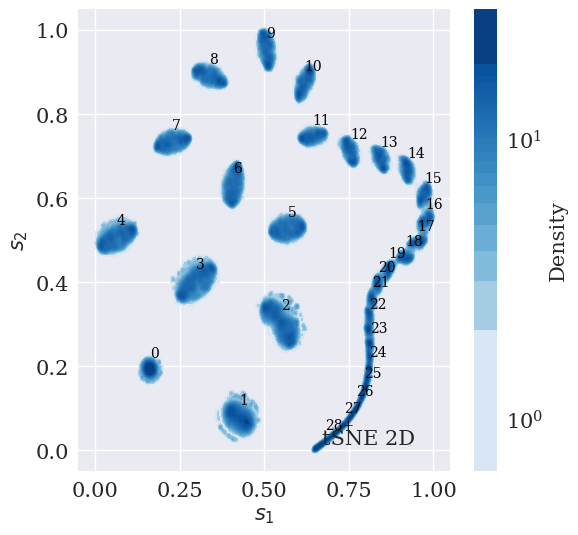

In [83]:
name_method = 'tSNE 2D'
gm = gaussian_mixture(
   X_low = X_l_tSNE,
   X_high = data_test,
   number_cluster = 29,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

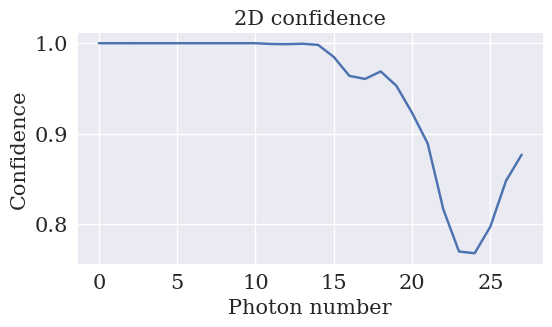

In [84]:
gm.plot_confidence_2d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

In [85]:
X_l_tSNE = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = TSNE,
   n_components = 1, 
   perplexity = 450, 
   random_state = 42
)

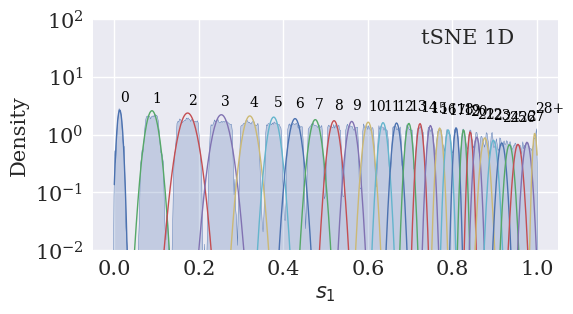

In [86]:
name_method = 'tSNE 1D'
gm = gaussian_mixture(
   X_low = X_l_tSNE,
   X_high = data_test,
   number_cluster = 29,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

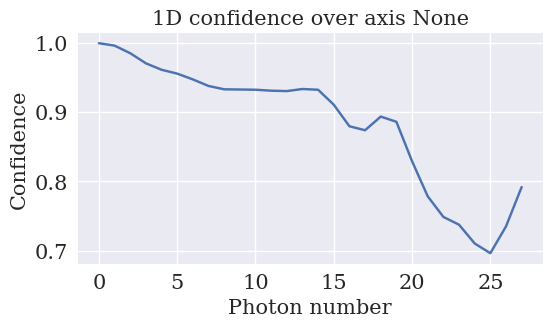

In [87]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### UMAP

In [88]:
X_l_UMAP = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD+'/umap1d', 
   function = umap.UMAP, 
   custom_name = '1000.npy', 
   n_components = 1, 
   n_neighbors = 1000, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


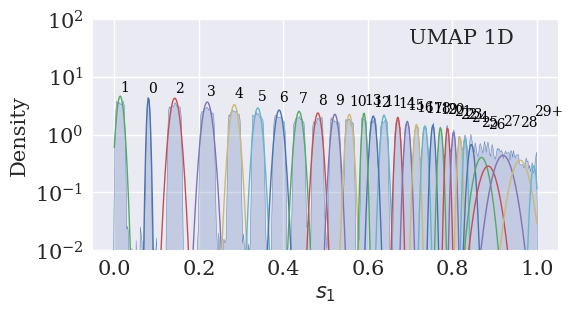

In [89]:
name_method = 'UMAP 1D'
gm = gaussian_mixture(
   X_low = X_l_UMAP,
   X_high = data_test,
   number_cluster = 30,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-8,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

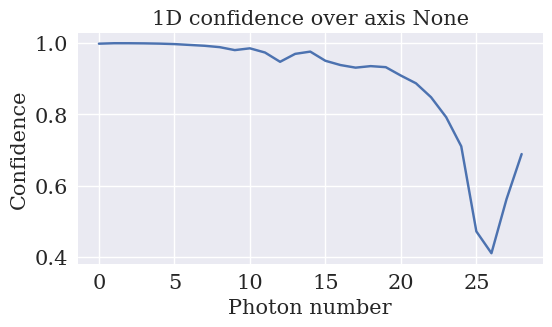

In [90]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

In [91]:
X_l_UMAP = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD+'/umap2d', 
   function = umap.UMAP, 
   custom_name = '700.npy',
   n_components = 2, 
   n_neighbors = 700, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


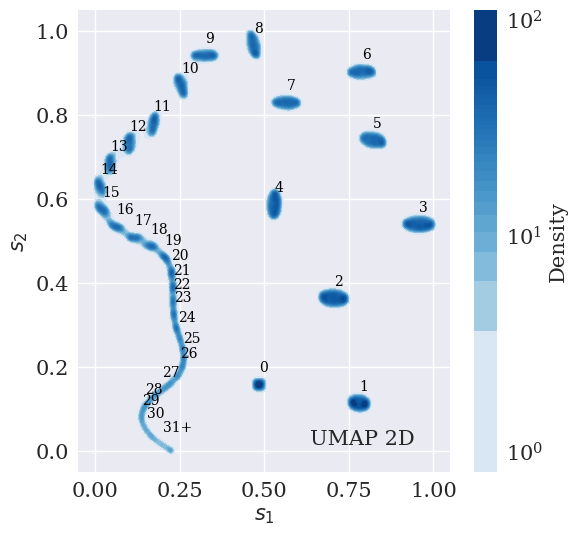

In [92]:
name_method = 'UMAP 2D'
gm = gaussian_mixture(
   X_low = X_l_UMAP,
   X_high = data_test,
   number_cluster = 32,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4,
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1,
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

In [93]:
gm.remove_clusters([15])
means = gm.cluster_means

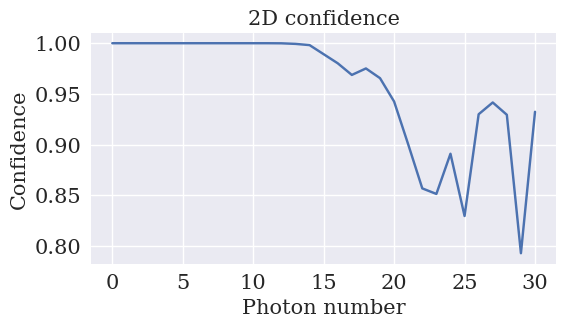

In [94]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Non-Negative Matrix Factorization (NMF)

In [95]:
X_l_NMF = sklearn_available(
   X_train = 1+data_train, 
   X_test = 1+data_test, 
   path_save = PATH_SAVE_LD, 
   function = NMF,
   n_components = 1, 
   max_iter = 400, 
   solver = 'mu', 
   beta_loss = 'kullback-leibler', 
   tol = 1e-10, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


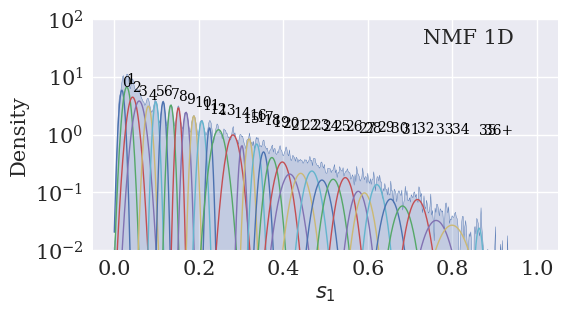

In [96]:
name_method = 'NMF 1D'
gm = gaussian_mixture(
   X_low = X_l_NMF,
   X_high = data_test,
   number_cluster = 37,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-8,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.05, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

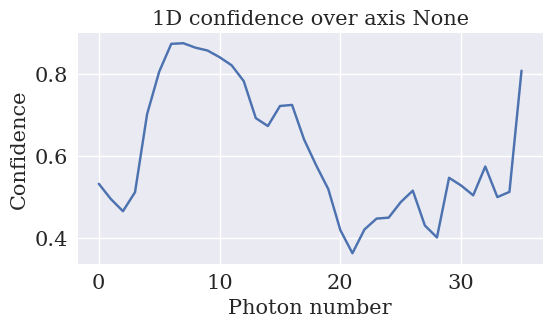

In [97]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Isomap

In [98]:
X_l_ISO = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = Isomap, 
   n_neighbors = 15, 
   n_components = 1, 
   eigen_solver = "arpack"
)

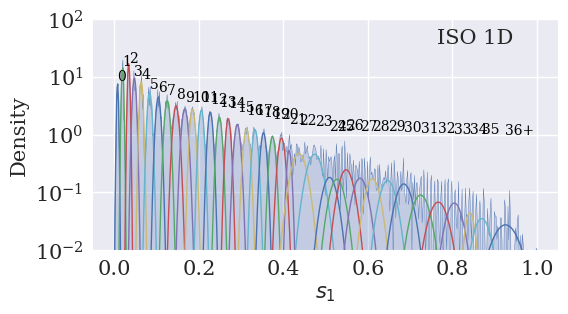

In [100]:
name_method = 'ISO 1D'
gm = gaussian_mixture(
   X_low = X_l_ISO,
   X_high = data_test,
   number_cluster = 37,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-8,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03,
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

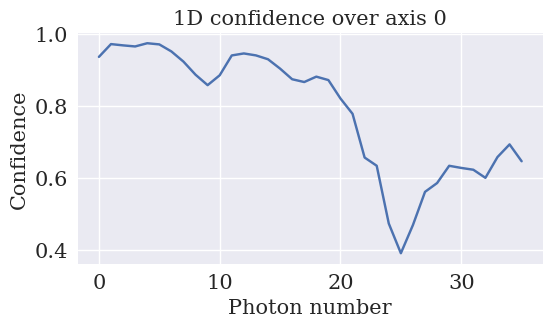

In [101]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Parametric t-SNE

In [102]:
model = load_model(Network, f'src/Parametric_TSNE/model 1D').to(device='cpu')

data_test_ = torch.from_numpy(data_test).float().view(-1, 350).to(device='cpu')
data_test_ = (data_test_ - data_test_.min()) / (data_test_.max() - data_test_.min())

with torch.no_grad():
    X_l_PTSNE = model(data_test_, encode = True).cpu().numpy()

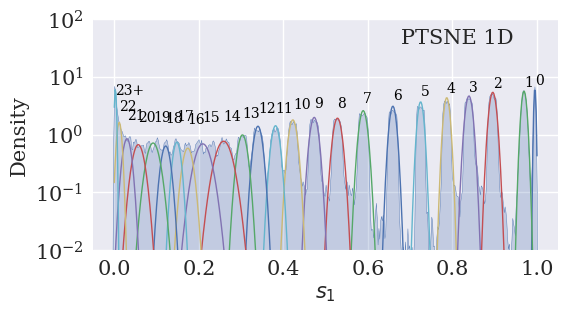

In [103]:
name_method = 'PTSNE 1D'
gm = gaussian_mixture(
   X_low = X_l_PTSNE,
   X_high = data_test,
   number_cluster = 24,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

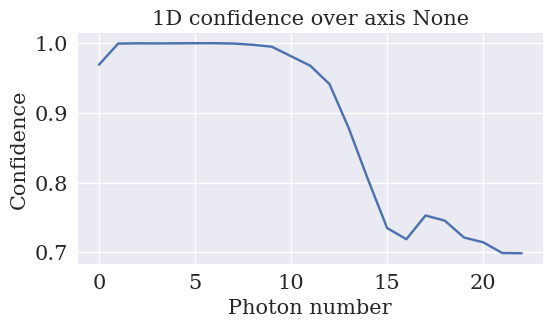

In [104]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Parametric UMAP

In [105]:
model = load_pumap('src/Parametric_UMAP/model 1D/model.ckpt').to('cpu')
X_PUMAP = model.encoder(torch.from_numpy(data_test).view(-1,350).to(dtype=torch.float)).detach().numpy()

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.


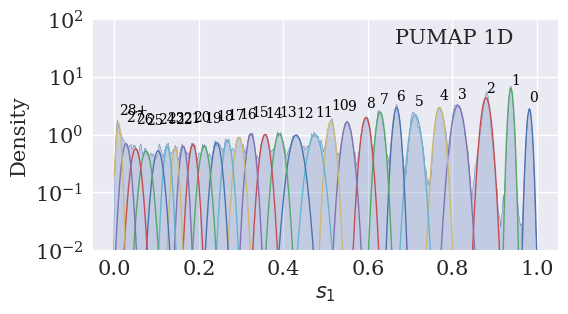

In [106]:
name_method = 'PUMAP 1D'
gm = gaussian_mixture(
   X_low = -X_PUMAP,
   X_high = data_test,
   number_cluster = 29,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)

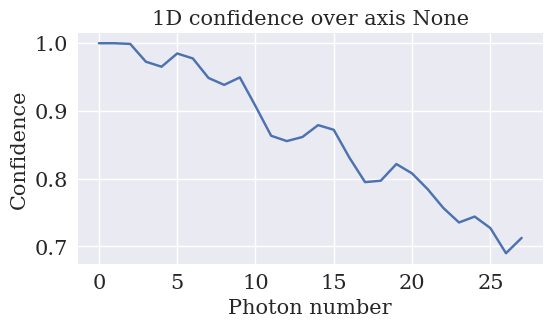

In [107]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)